# Date Processing:

### Import the necessary libraries and read the data.

In [1]:
#Import libraries that are necessary 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.simplefilter('ignore')

In [2]:
#importing a raw dataset as it is from the csv file given to the dataframe variable fifa
fifa=pd.read_csv("fifa.csv")

In [3]:
fifa.shape

(18207, 60)

### Drop any columns that you deem unecessary for analysis

In [4]:
fifafilter=fifa.drop(['Photo','Flag','Club Logo','Loaned From'],axis=1)

In [5]:
fifafilter.shape

(18207, 56)

### Check for missing values and do a mean imputation where necessary.

#### check for null values in columns that are need for analysis

In [6]:
#Percentage of null values is less.so,that we can drop are can mode full value with respect other value in that column.
fifafilter[['Value','Contract Valid Until','Wage','Height','Joined','Weight','Release Clause']].isnull().sum()

Value                      0
Contract Valid Until     289
Wage                       0
Height                    48
Joined                  1553
Weight                    48
Release Clause          1564
dtype: int64

#### Drop null values from columns.

In [7]:
#Release Clause column has less null values. Hence replacing them with 0 as some players can be bought without paying Release Clause (free agent).
fifafilter['Release Clause']=fifafilter['Release Clause'].fillna(0)

In [8]:
fifanonull=fifafilter.dropna(axis=0,subset=['Contract Valid Until','Height','Joined','Weight'])

### checking for null values in dataset(fifanonull)

In [9]:
fifanonull.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Jersey Number               0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility   

#### Convert to Float after getting rid of currency symbol and suffix for columns:'Value','Wage'and'Release Clause'

In [10]:
#define function to convert '€','M','K' from target columns.
def fun(x):
    x=str(x)
    if '€'in x:
        x=x.replace('€',"")
    if 'M'in x:
        a=pow(10,6)
        x=x.replace('M',"")
        x=str(float(x)*a)
    if 'K' in x:
        b=pow(10,3)
        x=x.replace('K','')
        x=str(float(x)*b)
    return x


#### Getting rid of currency symbol and suffix from value,wage and Release clause then convert to float

In [11]:
fifanonull['Value']=fifanonull['Value'].apply(fun).astype(float)
fifanonull['Wage']=fifanonull['Wage'].apply(fun).astype(float)
fifanonull['Release Clause']=fifanonull['Release Clause'].apply(fun).astype(float)

In [12]:
#Checking columns whether it convert to float type are not.
fifanonull[['Value','Wage','Release Clause']].dtypes

Value             float64
Wage              float64
Release Clause    float64
dtype: object

#### Converting the values 'Joined' column  to int with only year values

In [13]:
fifanonull['Joined']=fifanonull['Joined'].apply(lambda x:int(x[-4:]))

#### Converting the values of 'Contract Valid Until' from string to datetime

In [14]:
fifanonull['Contract Valid Until']=fifanonull['Contract Valid Until'].apply(lambda x: dt.datetime.strptime(x[-4:],'%Y').year)

#### Converting the valus of 'Height' column from feet'inches to float type feet

In [15]:
fifanonull['Height']=fifanonull['Height'].apply(lambda x : float(x.split("'")[0])+float(x.split("'")[1])/12)

#### Converting the values of 'Weight' column to float type after removing the suffix 'lbs

In [16]:
fifanonull['Weight'].replace({'lbs':''},regex=True,inplace=True)
fifanonull['Weight']=fifanonull['Weight'].astype(float)

# Exploratory Analysis

### Plot the distribution of Overall rating for all players

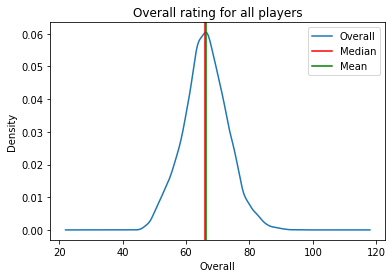

In [17]:
fifanonull['Overall'].plot(kind='kde')
plt.axvline(fifanonull['Overall'].median(),color='r',label='Median')
plt.axvline(fifanonull['Overall'].mean(),color='g',label='Mean')
plt.xlabel('Overall')
plt.title('Overall rating for all players')
plt.legend()
plt.show()

### Generate pair plots for the following variables:
  +  Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

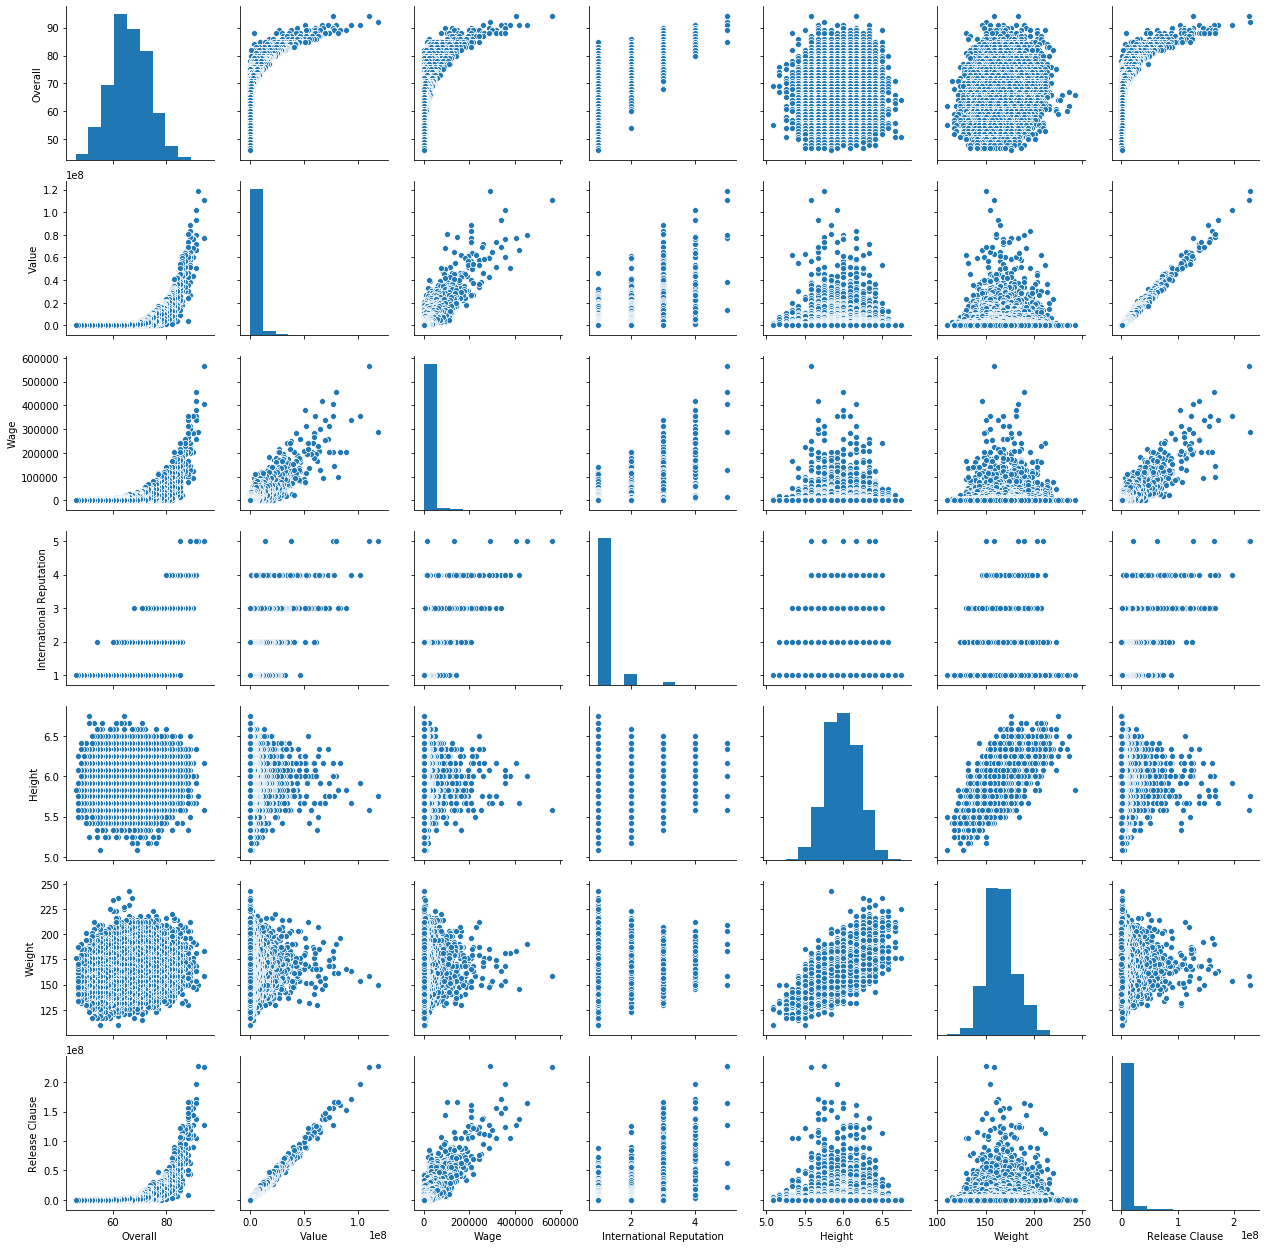

In [18]:
sns.pairplot(data=fifanonull,vars=['Overall','Value','Wage','International Reputation','Height','Weight','Release Clause'])
plt.show()

#### Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [19]:
fifafinal=fifanonull.copy()
fifafinal=fifafinal[fifafinal['Contract Valid Until']==2020].sort_values(by='Overall',axis=0,ascending=False)
#Top 20 players ranked by overall score
top_players=fifafinal[0:20]
top_players

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
13,168542,David Silva,32,Spain,90,90,Manchester City,60000000.0,285000.0,Left,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0
21,179813,E. Cavani,31,Uruguay,89,89,Paris Saint-Germain,60000000.0,200000.0,Right,...,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0
31,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,Right,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0
39,164240,Thiago Silva,33,Brazil,88,88,Paris Saint-Germain,24000000.0,165000.0,Right,...,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44400000.0
50,175943,D. Mertens,31,Belgium,87,87,Napoli,45000000.0,135000.0,Right,...,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,76500000.0


#### What would the average wage for this set of players be?

In [20]:
top_players['Wage'].mean()

205450.0

Average wages for top 20 players whose contract expries in 2020:205450.0

#### What is the average age?

In [21]:
average_age=top_players['Age'].mean()
average_age

30.65

In [22]:
#Age should not be in float value 
round(average_age)

31

Average age of top 20 players whose contract expires in 2020:31

#### Is there a correlation between the Overall rating and Value for these players?

In [23]:
top_players.corr()['Overall']['Value']
print("Correlation between the Overall rating and Value for these players :",top_players.corr()['Overall']['Value'])

Correlation between the Overall rating and Value for these players : 0.7867166042074153


### Generate tables containing the top 5 players by Overall rating for each unique position

In [24]:
#For ever unique position(27) there are 135 total with respective to top 5 players.
top5=fifanonull.sort_values(by='Overall',ascending=False).groupby(by='Position').head(5)
top5

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,230276,Nicolás Formido,30,Brazil,74,74,Internacional,5500000.0,23000.0,Left,...,72.0,18.0,29.0,21.0,9.0,8.0,8.0,7.0,12.0,10500000.0
2330,230272,Kauã Abranches,34,Brazil,74,74,Paraná,2800000.0,19000.0,Right,...,68.0,34.0,58.0,57.0,8.0,10.0,12.0,20.0,19.0,5400000.0
2322,230267,Sebas Couteira,30,Brazil,74,74,Atlético Paranaense,5500000.0,14000.0,Right,...,71.0,32.0,52.0,41.0,15.0,13.0,12.0,10.0,9.0,10500000.0
2247,230487,Leo Caldeirinha,34,Brazil,74,74,Vitória,2800000.0,13000.0,Left,...,76.0,25.0,24.0,22.0,18.0,16.0,13.0,15.0,15.0,5400000.0


#### Are there any players appearing in more than one Table. Please point out such players

In [25]:
#There are no player appearing in more than one game.
top5['ID'].duplicated().sum()

0

#### What is the average wage one can expect to pay for the top 5 in every position

In [26]:
top5.groupby(by='Position')['Wage'].mean().sort_values(ascending=False)

Position
ST     294000.0
LW     261000.0
RCM    257400.0
RCB    219000.0
RW     202000.0
CDM    199200.0
LCM    195400.0
GK     192800.0
LB     177200.0
CAM    174000.0
LM     169000.0
LCB    162000.0
RB     155400.0
RF     148000.0
CM     134600.0
RM     133000.0
RS     130400.0
CB     124800.0
LF     123200.0
RDM    105000.0
LDM    103800.0
LS      92200.0
CF      47400.0
RAM     46600.0
RWB     44200.0
LWB     30000.0
LAM     19000.0
Name: Wage, dtype: float64

In [27]:
#Above data is average wages pay for players with respective every position.